In [1]:
# importing libraries needed for scraping and analysis (would need to install them if not installed using pip install)
import pandas as pd 
from bs4 import BeautifulSoup
import requests
from urllib.parse import urljoin

In [2]:
# using the requests module to laod the data using the get function 
url = 'https://books.toscrape.com/catalogue/category/books_1/index.html'
data = requests.get(url).text # the .text function output the data as plian texts 
print (data)



<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html lang="en-us" class="no-js"> <!--<![endif]-->
    <head>
        <title>
    Books | 
     Books to Scrape - Sandbox

</title>

        <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
        <meta name="created" content="24th Jun 2016 09:29" />
        <meta name="description" content="
    
" />
        <meta name="viewport" content="width=device-width" />
        <meta name="robots" content="NOARCHIVE,NOCACHE" />

        <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
        <!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->

        
            <link rel="shortcut icon" href="../../../stat

In [3]:
work_data = BeautifulSoup(data, 'html.parser') # Parsing the document 
title = work_data.find_all('h3') # Scraping the titles of the book

In [4]:
# Creating an empty array and appending the titles to it using a loop
Title = []
for row in title:
    dummy = row.text
    Title.append(dummy)
print (Title)

['A Light in the ...', 'Tipping the Velvet', 'Soumission', 'Sharp Objects', 'Sapiens: A Brief History ...', 'The Requiem Red', 'The Dirty Little Secrets ...', 'The Coming Woman: A ...', 'The Boys in the ...', 'The Black Maria', 'Starving Hearts (Triangular Trade ...', "Shakespeare's Sonnets", 'Set Me Free', "Scott Pilgrim's Precious Little ...", 'Rip it Up and ...', 'Our Band Could Be ...', 'Olio', 'Mesaerion: The Best Science ...', 'Libertarianism for Beginners', "It's Only the Himalayas"]


In [5]:
# # Creating an empty array and appending the price to it using a loop
price = work_data.find_all('p', class_="price_color")
Price = []

for x in price:
    storage = x.text
    Price.append(storage)

print(Price)

['Â£51.77', 'Â£53.74', 'Â£50.10', 'Â£47.82', 'Â£54.23', 'Â£22.65', 'Â£33.34', 'Â£17.93', 'Â£22.60', 'Â£52.15', 'Â£13.99', 'Â£20.66', 'Â£17.46', 'Â£52.29', 'Â£35.02', 'Â£57.25', 'Â£23.88', 'Â£37.59', 'Â£51.33', 'Â£45.17']


In [6]:
# Creating an empty array, a dictionary to create the numerical values of the ratings and appending the ratings to it using a loop
books = work_data.find_all('article', class_='product_pod')  # Each book

rating_map = {
    'Five': 5,
    'Four': 4,
    'Three': 3,
    'Two': 2,
    'One': 1
}

ratings = []

for book in books:
    rating_tag = book.find('p', class_='star-rating')
    rating_classes = rating_tag.get('class')  # e.g., ['star-rating', 'Three']
    rating_word = rating_classes[1]  # Extract the rating word (e.g., 'Three')
    rating_score = rating_map.get(rating_word, 0)
    ratings.append(rating_score)

print(ratings)


[3, 1, 1, 4, 5, 1, 4, 3, 4, 1, 2, 4, 5, 5, 5, 3, 1, 1, 2, 2]


In [7]:
# Gathers all books attributes
availability = work_data.find_all('article', class_='product_pod')

In [8]:
# creating an empty array and then adding the column to it
Available = []
for x in availability:
    availability_tag =  work_data.find('p', class_="instock availability")
    availability_text = availability_tag.text.strip() # outputs the plain texts and clears white spaces 
    Available.append(availability_text)

In [9]:
# finding the category for books that are in different pages 
base_url = 'page-1.html'
category_data = requests.get(urljoin(base_url,url)) # using the urljoin function to connect to both pages 
parse = BeautifulSoup(category_data.text, 'html.parser')
books = parse.find_all('article', class_='product_pod')

category_dataframe = []

for book in books:
    relative_link = book.h3.a['href']
    full_link= urljoin(url, relative_link) # looping through each link to get the category data 
    book_resp = requests.get(full_link)
    book_soup = BeautifulSoup(book_resp.text, 'html.parser')
    breadcrumb = book_soup.find('ul', class_ = 'breadcrumb')
    category_tag = breadcrumb.find_all('a')[2]
    category = category_tag.text.strip()
    category_dataframe.append(category)

In [10]:
# Creating a dataframe for all the arrays 
scrape_books_dataframe = pd.DataFrame( {'TITLE':Title,
                                       'PRICE':Price,
                                       'RATING':ratings,
                                       'AVAILABILITY':Available,
                                       'CATEGORY':category_dataframe})
csv = scrape_books_dataframe.to_csv('scraped books.csv', index = False) # saving it as a csv file 
scrape_books_dataframe

,TITLE,PRICE,RATING,AVAILABILITY,CATEGORY
0,A Light in the ...,Â£51.77,3,In stock,Poetry
1,Tipping the Velvet,Â£53.74,1,In stock,Historical Fiction
2,Soumission,Â£50.10,1,In stock,Fiction
3,Sharp Objects,Â£47.82,4,In stock,Mystery
4,Sapiens: A Brief History ...,Â£54.23,5,In stock,History
5,The Requiem Red,Â£22.65,1,In stock,Young Adult
6,The Dirty Little Secrets ...,Â£33.34,4,In stock,Business
7,The Coming Woman: A ...,Â£17.93,3,In stock,Default
8,The Boys in the ...,Â£22.60,4,In stock,Default
9,The Black Maria,Â£52.15,1,In stock,Poetry


In [11]:
# removing the symbols on the price column
scrape_books_dataframe['PRICE'] = scrape_books_dataframe['PRICE'].str.replace('Â£', '', regex = False).astype(float)
scrape_books_dataframe

,TITLE,PRICE,RATING,AVAILABILITY,CATEGORY
0,A Light in the ...,51.77,3,In stock,Poetry
1,Tipping the Velvet,53.74,1,In stock,Historical Fiction
2,Soumission,50.10,1,In stock,Fiction
3,Sharp Objects,47.82,4,In stock,Mystery
4,Sapiens: A Brief History ...,54.23,5,In stock,History
5,The Requiem Red,22.65,1,In stock,Young Adult
6,The Dirty Little Secrets ...,33.34,4,In stock,Business
7,The Coming Woman: A ...,17.93,3,In stock,Default
8,The Boys in the ...,22.60,4,In stock,Default
9,The Black Maria,52.15,1,In stock,Poetry


In [12]:
# find the average price of book by category 
avg_price_by_category = scrape_books_dataframe.groupby('CATEGORY')['PRICE'].mean()
print (avg_price_by_category)

CATEGORY
Business              33.340000
Default               18.173333
Fiction               50.100000
Historical Fiction    53.740000
History               54.230000
Music                 46.135000
Mystery               47.820000
Poetry                37.115000
Politics              51.330000
Science Fiction       37.590000
Sequential Art        52.290000
Travel                45.170000
Young Adult           20.055000
Name: PRICE, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

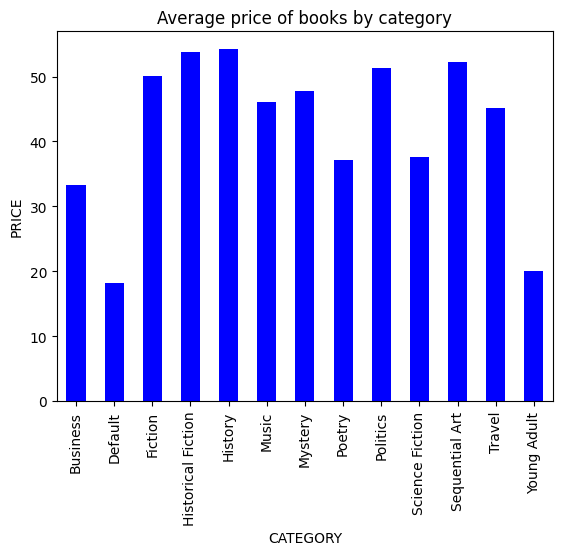

In [13]:
# plotting a map to visualize findings 
import matplotlib.pyplot as plt
avg_price_by_category.plot(kind = 'bar', color = 'blue')
plt.xlabel('CATEGORY')
plt.ylabel('PRICE')
plt.title('Average price of books by category')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

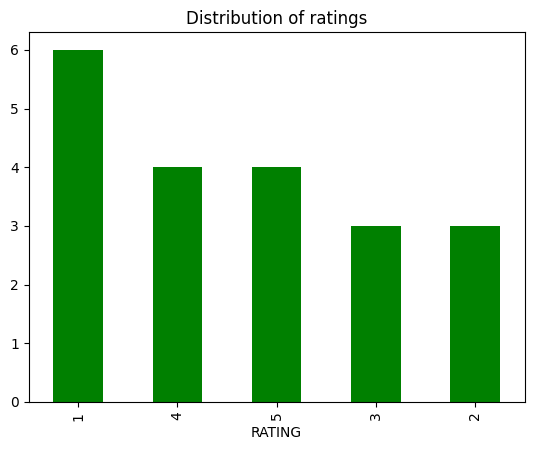

In [14]:
# finding out the distribution of ratings and visualizing it 
rating_distribution = scrape_books_dataframe['RATING'].value_counts()
rating_distribution.plot(kind =  'bar', color = 'green')
plt.xlabel('RATING')
plt.title('Distribution of ratings')
plt.show

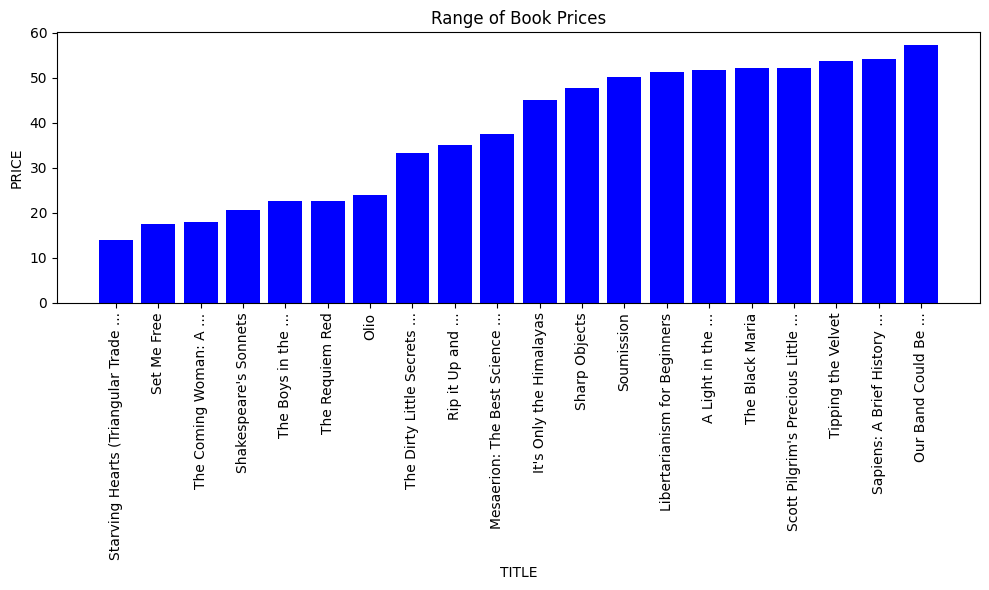

In [15]:
# finding the individual cost of each book 
# Sort the dataframe by price
price_of_books = scrape_books_dataframe.sort_values(by='PRICE')

# Extract titles and prices
titles = price_of_books['TITLE']
prices = price_of_books['PRICE']

# Create a bar chart
plt.figure(figsize=(10, 6))  # Optional: better layout
plt.bar(titles, prices, color='blue')
plt.xlabel('TITLE')
plt.ylabel('PRICE')
plt.title('Range of Book Prices')
plt.xticks(rotation=90)  # Rotate x labels for readability
plt.tight_layout()  # Prevent label cutoff
plt.show()


CATEGORY
Business              1
Default               3
Fiction               1
Historical Fiction    1
History               1
Music                 2
Mystery               1
Poetry                4
Politics              1
Science Fiction       1
Sequential Art        1
Travel                1
Young Adult           2
Name: AVAILABILITY, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

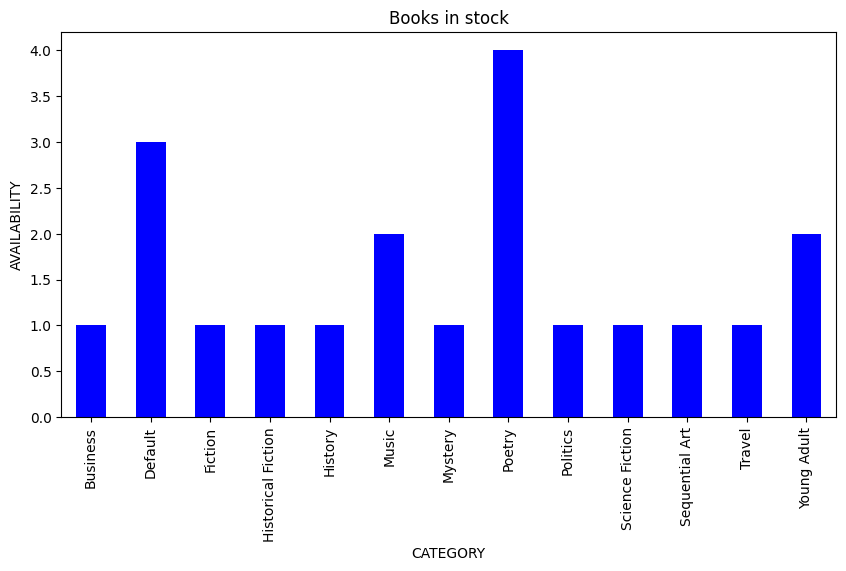

In [16]:
# finding out which category of books are in stock and then visualizing it 
scrape_books_dataframe['AVAILABILITY'] = scrape_books_dataframe['AVAILABILITY'].apply(lambda x:1 if 'In stock' in str(x) else 0)
books_in_stock = scrape_books_dataframe.groupby('CATEGORY')['AVAILABILITY'].sum()
print(books_in_stock)
plt.figure(figsize = (10,5))
books_in_stock.plot( kind = 'bar', color = 'blue')
plt.xlabel('CATEGORY')
plt.ylabel('AVAILABILITY')
plt.title('Books in stock')
plt.show